# Tree based classification 이해 및 실습
### # 1. 여러 명령어 한번에 보기와 버젼에 따른 에러 프린트 삭제

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

# <font color='blue'> A. 머신러닝 학습 프로세스

## 1. 목적정의
### 정확도(Accuracy)를 평가지표로 예측 모형 선정

## 2. 자료 정제 분석
### 자료 확보

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data.DESCR)

# 3. 특성변수
## 부적합에 영향을 미치는 변수 선정
### 'worst smoothness', 'worst perimeter' 2개의 특성변수로  'target'을 예측

In [3]:
import pandas as pd
pd.options.display.precision = 2

In [5]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

df = X.merge(y, left_index=True, right_index=True)
df.shape
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,5.69e+02,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,6.28e-02,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,7.06e-03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,5.00e-02,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,5.77e-02,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,6.15e-02,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,6.61e-02,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,9.74e-02,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


In [ ]:
df.target.value_counts(normalize=True)

1    0.63
0    0.37
Name: target, dtype: float64

In [9]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [13]:
df.target = df.target.replace({0:1, 1:0})
data =df[['worst smoothness', 'worst perimeter', 'target']]
data

,worst smoothness,worst perimeter,target
0,0.16,184.60,1
1,0.12,158.80,1
2,0.14,152.50,1
3,0.21,98.87,1
4,0.14,152.20,1
...,...,...,...
564,0.14,166.10,1
565,0.12,155.00,1
566,0.11,126.70,1
567,0.17,184.60,1


In [ ]:
df.target.value_counts(normalize=True)

0    0.63
1    0.37
Name: target, dtype: float64

# 4. 모형 평가
## 모형의 정확도를 기준(Accuracy)

In [14]:
X = data.drop('target', axis=1) # data.drop(columns=['target'])
y = data['target']

### # 2. 다양한 알고리즘 소환

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble


In [19]:
clfs = [KNeighborsClassifier(), LogisticRegression(),  GaussianNB(), 
        SVC(), DecisionTreeClassifier(), ensemble.RandomForestClassifier()]

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
for i, clf in enumerate(clfs) :
  clf.fit(X,y)
  y_pred = clf.predict(X)
  print(f'{i+1}. {clf}모형의 정확도 {metrics.accuracy_score(y_pred, y).round(2)}\n')

In [22]:
clf.predict_proba(X)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.04, 0.96],
       [0.  , 1.  ],
       [1.  , 0.  ]])

## 자료 표준화

$$\hat{y} = f \left( x \right) \approx y$$
$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx$$

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)
#scaler = StandardScaler()
#data.loc[:, 'worst smoothness' : 'worst perimeter'] = scaler.fit_transform(X)

In [ ]:
scaler.fit_transform(X).mean(0)

array([-2.37263831e-16, -3.74627101e-16])

In [ ]:
scaler.fit_transform(X).std(0)

array([1., 1.])

In [ ]:
# 데이터세트에 직접 적용하는 경우
#scaler = StandardScaler()
#data.loc[:, 'worst smoothness' : 'worst perimeter'] = scaler.fit_transform(X)

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
for i, clf in enumerate(clfs) :
  y_pred = clf.fit(X_scaled,y).predict(X_scaled)
  print(f'{i+1}. {clf}모형의 정확도 {metrics.accuracy_score(y_pred, y).round(2)}\n')

1. KNeighborsClassifier()모형의 정확도 0.96

2. LogisticRegression()모형의 정확도 0.96

3. GaussianNB()모형의 정확도 0.95

4. SVC()모형의 정확도 0.96

5. DecisionTreeClassifier()모형의 정확도 1.0

6. RandomForestClassifier()모형의 정확도 1.0



# <font color='blue'> B. Decision Tree 알고리즘
## 1. 데이터 확보(50개의 sample 데이터)

0    34
1    16
Name: target, dtype: int64

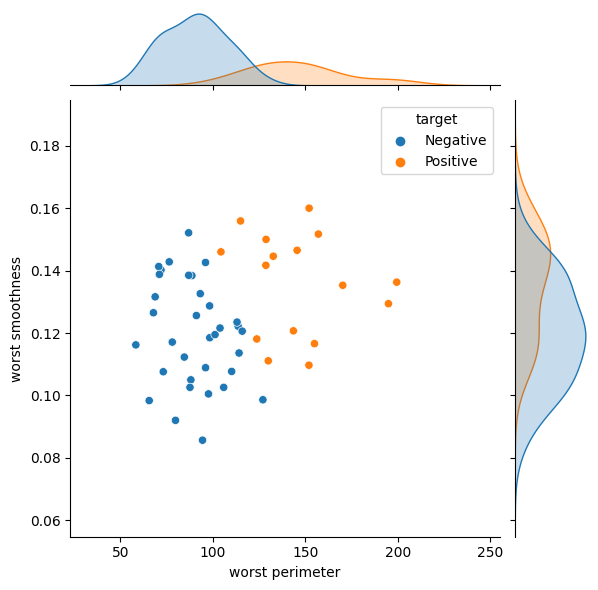

In [ ]:
import seaborn as sns
data = data.sample(50, random_state= 1024)
data.target.value_counts()
data.target = data.target.replace({0: 'Negative', 1: 'Positive'})
sns.jointplot(data=data, y='worst smoothness', x='worst perimeter', hue='target')

## 2. Pruning methods
## Level 1 - Stump

<ipython-input-24-f77b36a0cb8a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('target', 1)


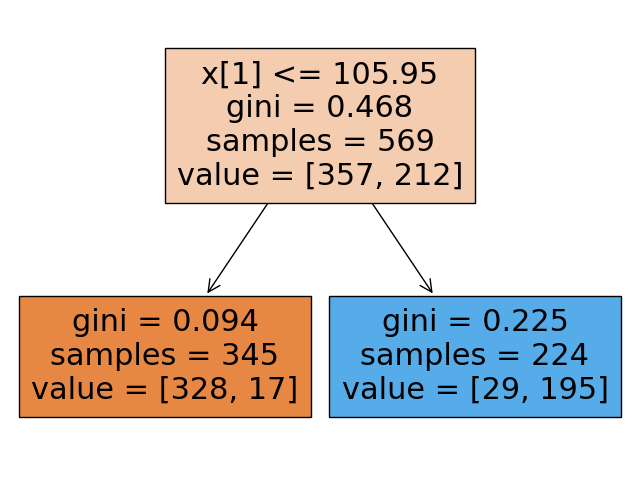

In [24]:
from sklearn.tree import plot_tree

X = data.drop('target', 1)
y = data.target

dt = DecisionTreeClassifier(max_depth=1, random_state=11)
dt.fit(X, y)

plt.figure(figsize=(8,6))
ax = plot_tree(dt, filled=True)

## Level 2

DecisionTreeClassifier(max_depth=2, random_state=11)

<Figure size 1000x800 with 0 Axes>

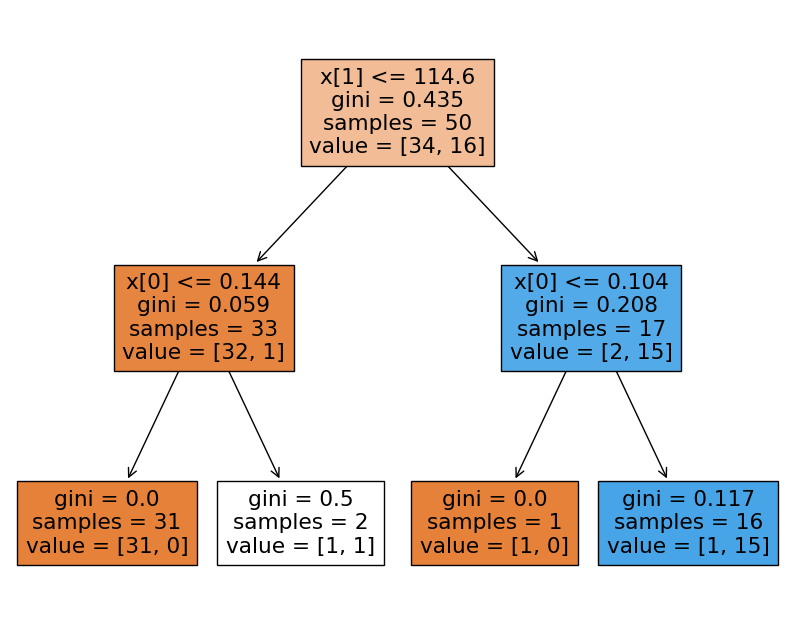

In [ ]:
dt = DecisionTreeClassifier(max_depth=2, random_state=11)

dt.fit(X, y)
plt.figure(figsize=(10,8))

ax = plot_tree(dt, filled=True)

## Level 4 - Overfitting

DecisionTreeClassifier(random_state=11)

<Figure size 800x600 with 0 Axes>

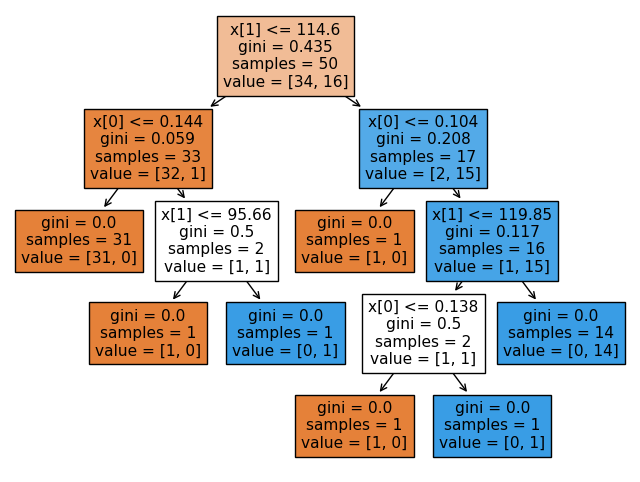

In [ ]:
X = data.drop('target', axis=1); y = data['target']

dt = DecisionTreeClassifier(random_state=11)
dt.fit(X, y)

plt.figure(figsize=(8,6))
ax = plot_tree(dt, filled=True)

## Nicolas de Condorcet’s Jury Theorm
### 3.  대중의 지혜(https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem)

<Figure size 2000x800 with 0 Axes>

Text(0.5, 0, '# of trials')

Text(0, 0.5, 'sentences of 5 juries')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

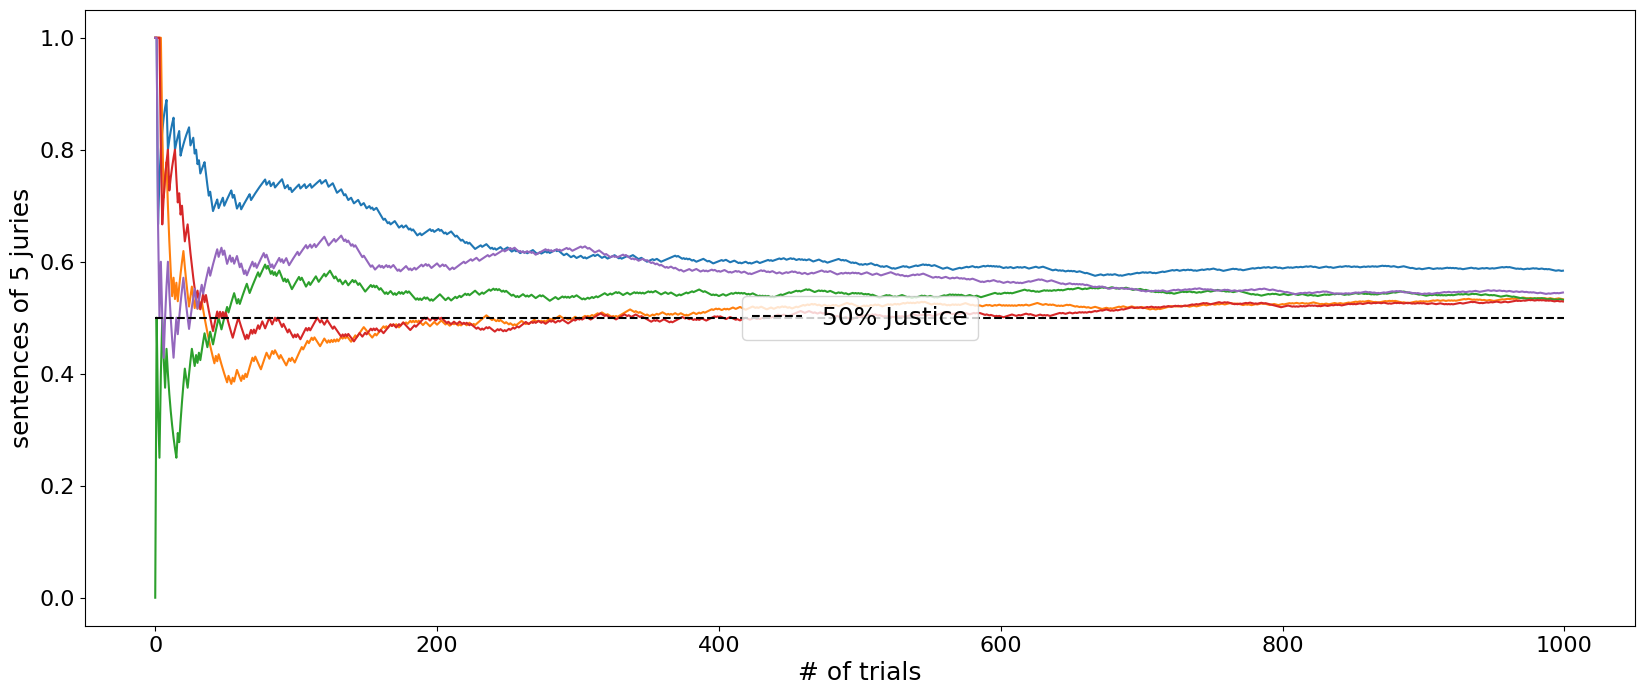

In [ ]:
import numpy as np
jurors_proba = 0.55 ; num_jurors = 5; num_trals = 1000 
num_decisions=(np.random.rand(num_trals, num_jurors)<jurors_proba)*1
total_trials = np.arange(1, num_trals+1).reshape(-1, 1)
cum_right_ratio=np.cumsum(num_decisions, axis=0)/total_trials
plt.figure(figsize=(20,8)); plt.plot(cum_right_ratio)
plt.plot([0, num_trals], [0.5, 0.5], 'k--', label='50% Justice')

plt.xlabel('# of trials', fontsize= '18'); plt.ylabel('sentences of 5 juries', fontsize= '18')
plt.xticks(fontsize= '16');plt.yticks(fontsize= '16')

plt.legend(fontsize=18, loc='center')

# <font color='blue'> C. 앙상블 모형(Ensemble)
## 전체 데이터 확보(모든 변수 사용)
    
## 1. Decision Tree 모형

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop('target', 1); y = df['target']
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size=0.4, 
                                                  stratify= y, random_state=11)

<ipython-input-26-2982729bad75>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('target', 1); y = df['target']


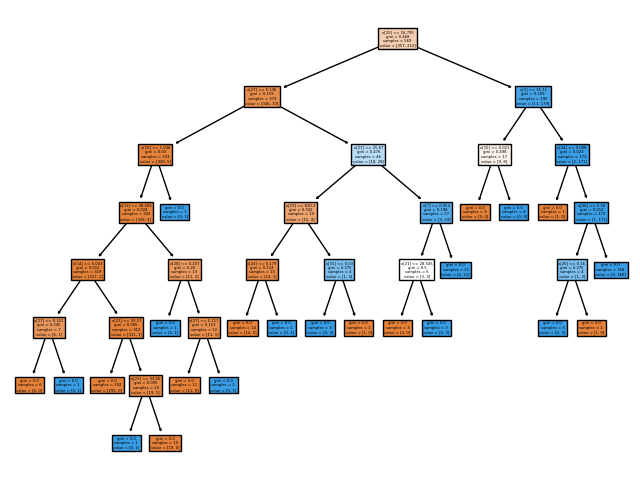

In [27]:
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X, y)

plt.figure(figsize=(8,6))
ax = plot_tree(dt, filled=True)

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=11)

dt.fit(X_train, y_train) # 알고리즘이 데이터를 학습하여 모델로 된다.

y_predict = dt.predict(X_test)

# dt.fit(X_train, y_train).predict(X_test)

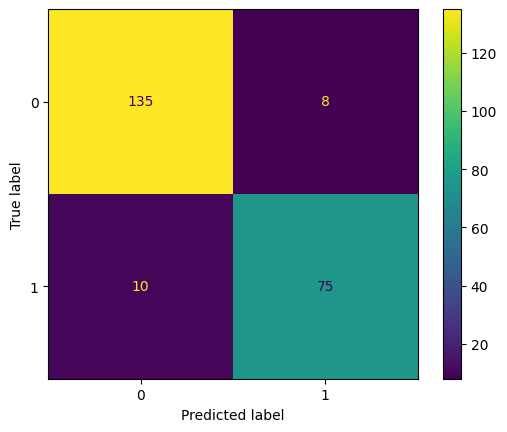

In [29]:
cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [30]:
confusion_matrix(y_test, y_predict, labels=clf.classes_)

array([[135,   8],
       [ 10,  75]])

In [31]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

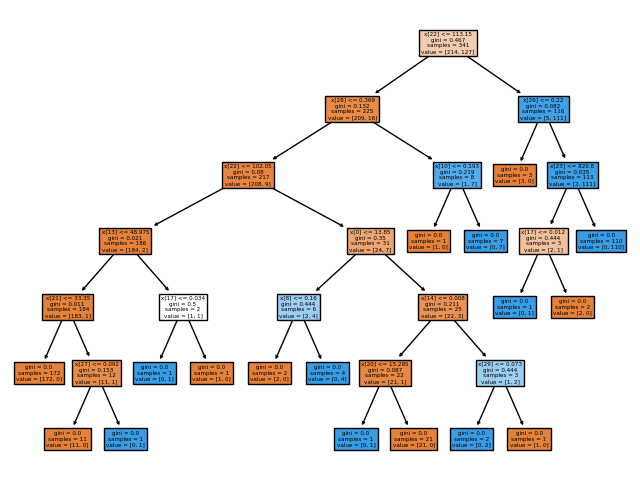

In [32]:
plt.figure(figsize=(8,6))
ax = plot_tree(dt, filled=True)

## 2. Bagging 모형

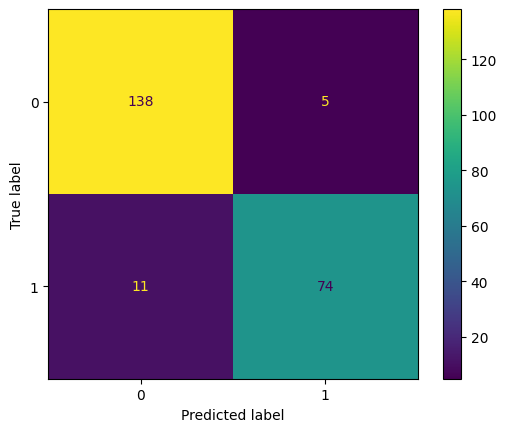

In [ ]:
import numpy as np
np.random.seed(1357)
from sklearn.metrics import ConfusionMatrixDisplay

bag = ensemble.BaggingClassifier(dt, n_estimators = 30, max_samples =0.8)

y_predict = bag.fit(X_train, y_train).predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       143
           1       0.94      0.87      0.90        85

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



In [ ]:
(138+74)/228 

0.9298245614035088

### # 4. RF 예측 성능 simulation

시뮬레이션 평균 정확도  0.9313199999999999


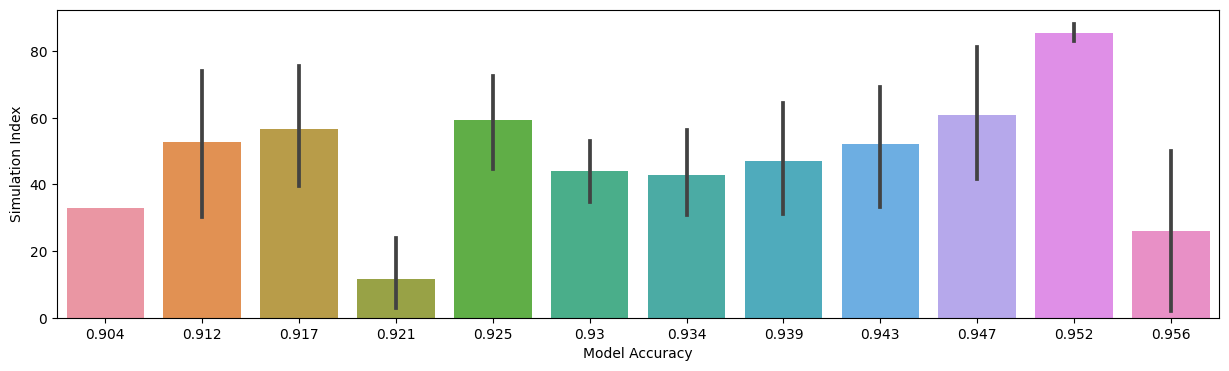

In [ ]:
import pandas as pd

acc_list = []
recall_list = []

for i in np.random.choice(2500, 100, replace=False) :
    clf = ensemble.BaggingClassifier(dt, n_estimators = 10, max_samples =0.8, random_state = i) 
    preds =  clf.fit(X_train, y_train).predict(X_test)  
    acc = round(metrics.accuracy_score(y_true = y_test, y_pred = preds), 3)
    recall = metrics.recall_score(y_true = y_test, y_pred = preds, average='macro')
    
    acc_list.append(acc)
    recall_list.append(recall)

data = (pd.Series(acc_list).reset_index().
        rename(columns={'index': 'Simulation Index', 0: 'Model Accuracy'}))
print('시뮬레이션 평균 정확도 ', data['Model Accuracy'].mean())

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax = sns.barplot(x='Model Accuracy', y='Simulation Index', data=data)

## 3. Random forest 모형

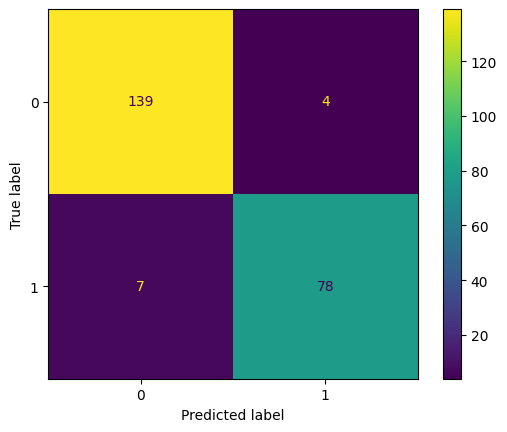

In [ ]:
np.random.seed(4321)

rf = ensemble.RandomForestClassifier(random_state=11)

y_predict = rf.fit(X_train, y_train).predict(X_test)


cm = confusion_matrix(y_test, y_predict, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

In [ ]:
(139+78)/228 

0.9517543859649122

In [ ]:
y_proba = rf.predict_proba(X_test)
print(f'정확도(accuracy): {metrics.accuracy_score(y_test, y_predict)}')
print(f'AUROC: {metrics.roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {metrics.average_precision_score(y_test, y_proba[:, 1])}')

정확도(accuracy): 0.9517543859649122
AUROC: 0.9950226244343892
AP: 0.9916048226041331


시뮬레이션 평균 정확도  0.9488199999999998


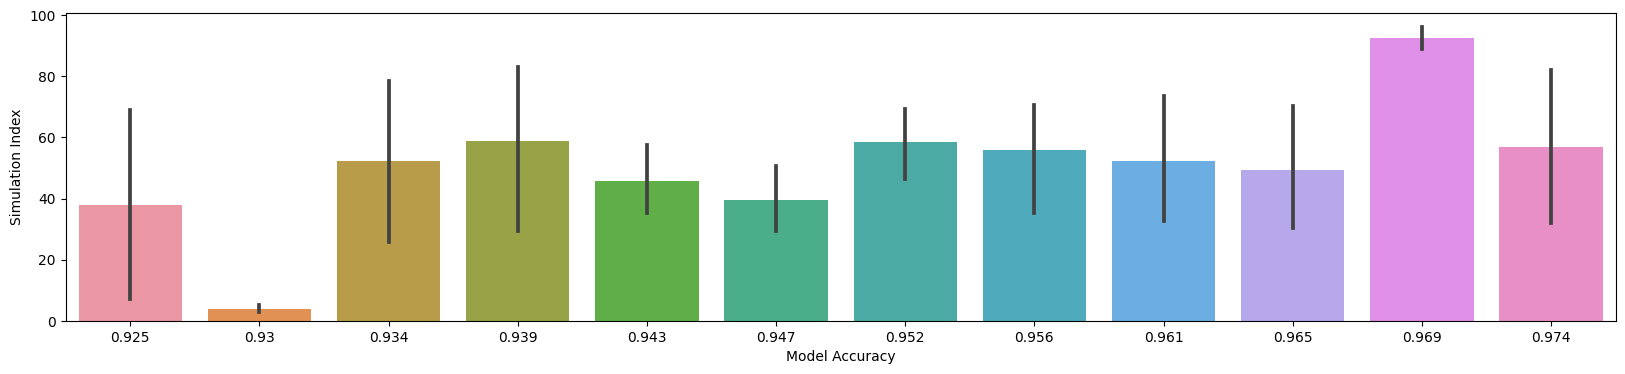

In [ ]:
acc_list = []
recall_list = []

for i in np.random.choice(2500, 100, replace=False) :
    clf = ensemble.RandomForestClassifier(n_estimators = 10, random_state = i) 
    preds =  clf.fit(X_train, y_train).predict(X_test)  
    acc = round(metrics.accuracy_score(y_true = y_test, y_pred = preds), 3)
    recall = metrics.recall_score(y_true = y_test, y_pred = preds, average='macro')
    
    acc_list.append(acc)
    recall_list.append(recall)

data = (pd.Series(acc_list).reset_index().
        rename(columns={'index': 'Simulation Index', 0: 'Model Accuracy'}))
print('시뮬레이션 평균 정확도 ', data['Model Accuracy'].mean())

fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
ax = sns.barplot(x='Model Accuracy', y='Simulation Index', data=data)

시뮬레이션 평균 검측율  0.9386297819827232


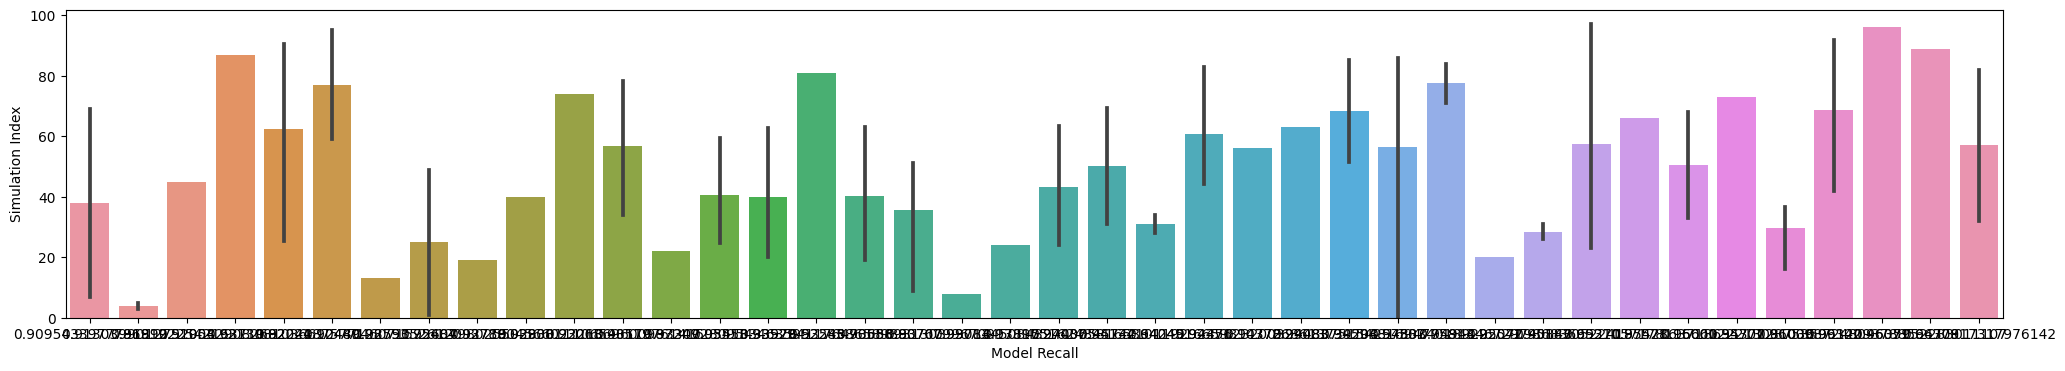

In [ ]:
data = (pd.Series(recall_list).reset_index().
        rename(columns={'index': 'Simulation Index', 0: 'Model Recall'}))
print('시뮬레이션 평균 검측율 ', data['Model Recall'].mean())

fig, ax = plt.subplots()
fig.set_size_inches(25, 4)
ax = sns.barplot(x='Model Recall', y='Simulation Index', data=data)

## 4. Extra 의사결정 모형

In [ ]:
ensemble.ExtraTreesClassifier

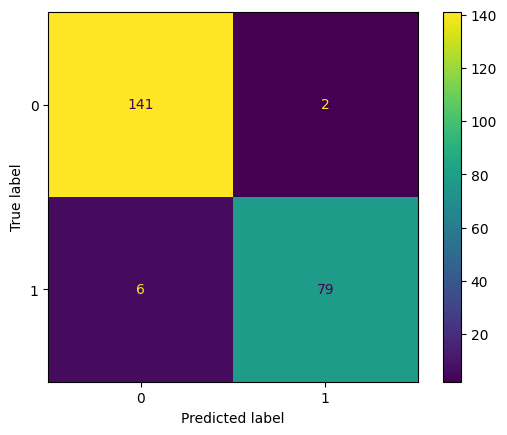

In [ ]:
extree = ensemble.ExtraTreesClassifier(random_state=0)
y_predict = extree.fit(X_train, y_train).predict(X_test)
y_proba = extree.predict_proba(X_test)
cm = confusion_matrix(y_test, y_predict, labels=extree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=extree.classes_)
disp.plot()

In [ ]:
print(f'정확도(accuracy): {metrics.accuracy_score(y_test, y_predict)}')
print(f'AUROC: {metrics.roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {metrics.average_precision_score(y_test, y_proba[:, 1])}')

정확도(accuracy): 0.9649122807017544
AUROC: 0.9962978198272316
AP: 0.993879620436114


### # 5.  recall, precision 그래프

In [ ]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

p, r, thresholds = metrics.precision_recall_curve(y_test, y_proba[:, 1])
scores = [np.sum(to_labels(y_proba[:, 1], t))/len(y_proba[:, 1]) for t in thresholds]

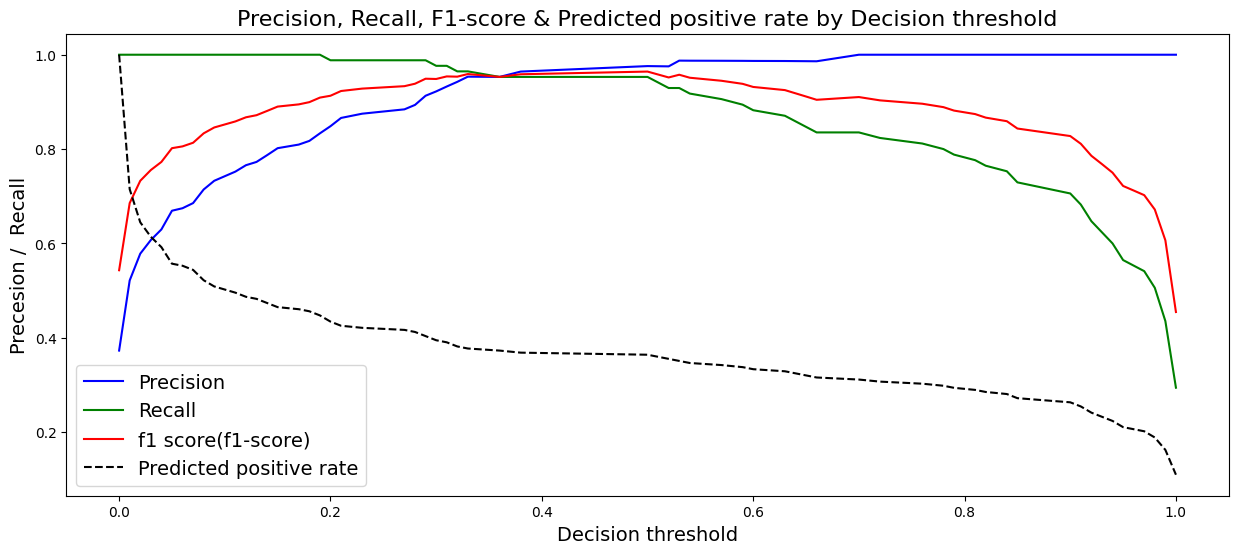

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (15,6)
    plt.title('Precision, Recall, F1-score & Predicted positive rate by Decision threshold', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='Precision') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score(f1-score)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='Predicted positive rate') # q-ratio
    plt.ylabel('Precesion /  Recall', fontsize='14') 
    plt.xlabel('Decision threshold', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
    plt.show()
    
plot_precision_recall_vs_threshold(p, r, thresholds)

# End